In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ScraNNtch
from ScraNNtch import Term , Neuron , MLP , Layer

In [49]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

X ,y =load_planar_dataset()
X = X.astype('float64')
y = y.astype('float64')

y = y*2 - 1 # make y be -1 or 1
y = y.flatten()
X = X.T

In [50]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network

In [51]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Term, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Term(data=1.0423424545305715, grad=0.0) 0.4475


In [52]:
print(X.shape, " - " ,y.shape)

(400, 2)  -  (400,)


In [53]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.back_propagation()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0423424545305715, accuracy 44.75%
step 1 loss 0.7852624660130754, accuracy 65.75%
step 2 loss 0.6286982849742678, accuracy 72.25%
step 3 loss 0.5527034009195748, accuracy 78.0%
step 4 loss 0.7340888726463333, accuracy 63.0%
step 5 loss 0.6452050053196247, accuracy 68.25%
step 6 loss 0.4877464259672686, accuracy 78.75%
step 7 loss 0.5454561167618227, accuracy 74.75%
step 8 loss 0.542319111445611, accuracy 75.0%
step 9 loss 0.416476892519858, accuracy 81.25%
step 10 loss 0.37248027152340807, accuracy 84.0%
step 11 loss 0.3619992383599835, accuracy 84.5%
step 12 loss 0.35304000028163635, accuracy 84.25%
step 13 loss 0.3465996696043383, accuracy 84.75%
step 14 loss 0.3416515870045262, accuracy 84.5%
step 15 loss 0.337540845799892, accuracy 85.75%
step 16 loss 0.33429906337639, accuracy 84.75%
step 17 loss 0.3312280984491542, accuracy 85.75%
step 18 loss 0.3288787154795244, accuracy 85.0%
step 19 loss 0.32629612727043406, accuracy 86.25%
step 20 loss 0.3244725678558745, accura

(-5.035124003739587, 4.964875996260413)

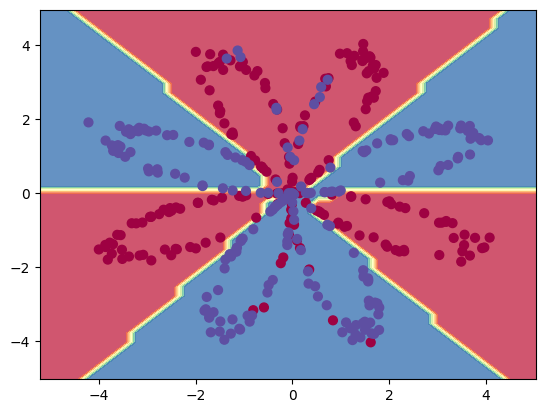

In [54]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Term, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())